# Analysis


Version 0.1.0 \| First Created Decmeber 1, 2023 \| Updated December 19, 2023

## Jupyter Notebook

This is an Jupyter Notebook document. For more details on using a Jupyter Notebook see <https://docs.jupyter.org/en/latest/>.



# Reproduction of Middlebury College's GIS Green Space Access in Chicago Lab

### Authors

- Tate Sutter\*, tsutter@middlebury.edu, @t-sutter, Middlebury College

\* Corresponding author and creator



### Abstract

This study is a *replication* of:

> [Week 07 Lab: Urban Environmental Justice of Green Space Access in Chicago](https://github.com/t-sutter/RPr-Chicago-Greenspaces/blob/main/docs/report/originalStudy.pdf), Human Geography with GIS, Middlebury College

The study replicates the lab *Urban Environmental Justice of Green Space Access in Chicago* within a Python coding language environment. The study reproduces an analysis of inhabitants' access to green space in Chicago. The original lab was performed in QGIS. The reproduction compares the geospatial tools of QGIS and the GeoPandas Python package and transitions the analysis from a graphical user interface (GUI) system to script based system. 


### Study metadata

- `Key words`: Urban Geography, Green Spaces, Chicago, Reproducibility, Open Science, Geospatial Python.
- `Subject`: Human Geography
- `Date created`: December 1, 2023. 
- `Date modified`: December 18, 2023.
- `Spatial Coverage`: Chicago, Illinois.
- `Spatial Resolution`: Census Block and Tract.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: 2010
- `Temporal Resolution`: This study does not address change over time. 

#### Original study spatio-temporal metadata

- `Spatial Coverage`: Chicago, Illinois.
- `Spatial Resolution`: Census Block and Tract.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: 2010
- `Temporal Resolution`: This study does not address change over time. 


## Study design

This study is a reproduction of an [observational lab](https://github.com/t-sutter/RPr-Chicago-Greenspaces/blob/main/docs/report/originalStudy.pdf) from the Middlebury College Department of Geography course Human Geography with GIS. The lab sought to replicate [*Wolch, Wilson and Fehrenbach's (2005)*](https://doi.org/10.2747/0272-3638.26.1.4) measurements of park space by racial groups at the census tract level in Los Angeles. The original lab deviates from *Wolch, Wilson, and Fehrenbach* initial study design. Chicago becomes the study extent. Access is grouped by racial majority group (>60%) per Census tract instead of varying racial breakdowns. The reproduction study contributes to the growing body of research working to improve [reproducibility](https://doi.org/10.1080/24694452.2020.1806029) and [replicability](https://doi.org/10.1080/24694452.2020.1806026) within GIS as a discipline and GIScience. The impermanence of public access to data, changes to GIS softwares, and lack of documentation of computational environments increases the difficulty to reproduce or replicate existing studies. 

In this reproduction study, I hypothesize that the original analysis performed in QGIS can be reproduced within a Python environment utilizing the GeoPandas geoprocessing package. To check my hypothesis, I compare the original results table with the one created in the reproduction.



## Computational environment

The reproduction study is run on a 2020 MacBook Pro with a 2.3 GHz Quad-Core Intel Core i7 processor and 16 GB 3733 MHz LPDDR4X. The computer employs the Sonoma 14.2 macOS operating system. The analysis is performed in JupyterLab 4.0.8 and utilizes Python 3.

The most important packages used are geopandas and pandas. The reproduction is built upon the two.

Maintaining a reproducible computational environment requires some conscious choices in package management.

Please refer to `00-Python-environment-setup.ipynb` for details.



In [1]:
# run directly if disposable
!pip install -r ../environment/requirements.txt

In [2]:
# Import modules, define directories
from pyhere import here
import geopandas as gpd
import pandas as pd
import folium as fm
import matplotlib as mpl

# You can define your own shortcuts for file paths:
path = {
    "dscr": here("data", "scratch"),
    "drpub": here("data", "raw", "public"),
    "drpriv": here("data", "raw", "private"),
    "ddpub": here("data", "derived", "public"),
    "ddpriv": here("data", "derived", "private"),
    "rfig": here("results", "figures"),
    "roth": here("results", "other"),
    "rtab": here("results", "tables"),
    "dmet": here("data", "metadata")
}

### Data and variables

The original lab and the reproduction study use the same data. All of the data is secondary data gathered from existing data sources. 

Each of the next subsections describes one data source.


#### Census Tracts 2010

**Standard Metadata**

- `Abstract`: Census tracts are the most commonly used of the US Census units of data aggregation. Census tracts average 4,000 inhabitants but can range between 1,200 and 8,000. 
- `Spatial Coverage`: City of Chicago.
- `Spatial Resolution`: Census Tracts.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: 2010. Estimate of April 1st.
- `Temporal Resolution`: The Census 2010 asked households to best answer the questions to be most accurate as of the 1st of April.
- `Lineage`: Data comes from the Census through Steven Manson, Jonathan Schroeder, David Van Riper, and Steven Ruggles. IPUMS National Historical Geographic Information System: Version 13.0 [Database]. Minneapolis: University of Minnesota. 2018. Data can be accessed at https://doi.org/10.18128/D050.V12.0. 
- `Distribution`: Data can be accessed through Steven Manson, Jonathan Schroeder, David Van Riper, and Steven Ruggles. IPUMS National Historical Geographic Information System: Version 13.0 [Database]. Minneapolis: University of Minnesota. 2018. Data can be accessed at https://doi.org/10.18128/D050.V12.0. 
- `Constraints`: The data is free to access for registered users. 
- `Data Quality`: The data is published as the official representation of demographics within the United States. The Census notes that there is a level of uncertainty inherent to the data.
- `Variables`: For each variable, enter the following information. If you have two or more variables per data source, you may want to present this information in table form (shown below)
  - `Label`: variable name as used in the data or code
  - `Alias`: intuitive natural language name
  - `Definition`: Short description or definition of the variable. Include measurement units in description.
  - `Type`: data type, e.g. character string, integer, real
  - `Accuracy`: e.g. uncertainty of measurements
  - `Domain`: Range (Maximum and Minimum) of numerical data, or codes or categories of nominal data, or reference to a standard codebook
  - `Missing Data Value(s)`: Values used to represent missing data and frequency of missing data observations
  - `Missing Data Frequency`: Frequency of missing data observations
  
  - N/A denotes not applicable. 

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| fid | Feature ID.| The fid is a feature ID for each row. This comes in as part of the imported .shapefile. | float64
 | N/A | 1-787 | N/A | N/A |
| STATEFP10 | State Identification Code. | This code is unique for Illinois. | object | N/A | N/A | N/A | N/A |
| COUNTYFP10 | County Identification Code. | This code is unique for a county within a state. | object | N/A | N/A | N/A | N/A |
| TRACTCE10 | Tract Identification Code. | This code is unique for a tract within a county. | object | N/A | N/A | N/A | N/A |
| GEOID10 | Geographic ID | GEOID10 is a unique identifier for the tract in the 2010 Census. It is a combination of the prior three codes.  | object | Each code is unique by tract. | N/A | N/A | N/A |
| NAME10 | Census tract name. | The tract name refers to the TRACTCE10. | object | N/A | N/A | N/A | N/A |
| NAMELSAD10 | Census tract name. | The tract name refers to the TRACTCE10 with a more descriptive title. | object | N/A | N/A | N/A | N/A |
| GISJOIN | GISJOIN | Same as the GEOID10 with a ‘G’ before each value. It is used to group smaller geometries into the tract scale. | object | N/A | N/A | N/A | N/A |
| PopTotal | Population Total | Total population in the tract. | float64 | N/A | 16498.0 | N/A | N/A |
| Latinx | Latinx | Latinx population in the tract. | float64 | N/A | 6699.0 | N/A | N/A |
| MedHouseVa | Median House Value | Median House Value in the tract. | float64 | N/A | 820200.0 | N/A | N/A |
| MedGrossRe | Median Gross Rent | Median gross rent in the tract |float64 | N/A | 1818.0 | N/A | N/A | N/A |
| pctWhite | Percent white | Percent of tract that identifies as non-Hispanic white. | float64 | 91.3 | N/A | N/A | N/A |
| pctBlack | Percent Black | Percent of tract that identifies as non-Hispanic Black. | float64 | 99.2 | N/A | N/A | N/A |
| pctLatinx | Percent Latinx | Percent of tract that identifies as Hispanic or Latino . | float64 | 98.7 | N/A | N/A | N/A |
| pctAsian | Percent Asian | Percent of tract that identifies as non-Hispanic Asian. | float64 | 88.8
 | N/A | N/A | N/A |
| majorGroup | Racial Majority Group | Racial group which makes up more then 60% of a tracts population. If no group makes up 60%, the tract is assigned ‘Mixed’. | object | ‘Black’, ‘White’, ‘Latinx’, ‘Asian’, ‘Mixed’ | N/A | N/A | N/A |
| cbdDist | Distance from the Central Business District | The variable measures the distance from Chicago’s central business district. It is calculated in a GIS. It appears to be in km. | float64 | 25.687 | N/A | N/A | N/A |
| cbdDir | Direction from the Central Business District | The direction of tracts from the central business district. It is calculated in a GIS. It appears to be in degrees. | float64 | 356.358 | N/A | N/A | N/A |
| geometry | Geometry | The variable denotes the geometries of each Census tract. | geometry | N/A | N/A | N/A | N/A |


In [3]:
# Load file.
tracts2010 = gpd.read_file( here(path["drpub"], "tracts2010dirdist.shp") )
# Convert file to GeoDataFrame.
tracts2010 = gpd.GeoDataFrame(tracts2010)

#### Census Blocks 2010

**Standard Metadata**

- `Abstract`: Census blocks are the smallest unit of data released by the Census. Blocks are self-contained, bounded by visible (roads, railroads) and nonvisible (political boundaries, property lines) features, and do not have a population limit. 
- `Spatial Coverage`: City limits of Chicago, Illinois.
- `Spatial Resolution`: Census Block.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: 2010.
- `Temporal Resolution`: The Census 2010 asked households to best answer the questions to be most accurate as of the 1st of April.
- `Lineage`: Data comes from the Census through Steven Manson, Jonathan Schroeder, David Van Riper, and Steven Ruggles. IPUMS National Historical Geographic Information System: Version 13.0 [Database]. Minneapolis: University of Minnesota. 2018. Data can be accessed at https://doi.org/10.18128/D050.V12.0.
- `Distribution`: Data can be accessed through Steven Manson, Jonathan Schroeder, David Van Riper, and Steven Ruggles. IPUMS National Historical Geographic Information System: Version 13.0 [Database]. Minneapolis: University of Minnesota. 2018. Data can be accessed at https://doi.org/10.18128/D050.V12.0. 
- `Constraints`: The data is free to access for registered users.
- `Data Quality`: The data is published as the official representation of demographics within the United States. The Census notes that there is a level of uncertainty inherent to the data.
- `Variables`: For each variable, enter the following information. If you have two or more variables per data source, you may want to present this information in table form (shown below)
  - `Label`: variable name as used in the data or code
  - `Alias`: intuitive natural language name
  - `Definition`: Short description or definition of the variable. Include measurement units in description.
  - `Type`: data type, e.g. character string, integer, real
  - `Accuracy`: e.g. uncertainty of measurements
  - `Domain`: Expected range of Maximum and Minimum of numerical data, or codes or categories of nominal data, or reference to a standard codebook
  - `Missing Data Value(s)`: Values used to represent missing data and frequency of missing data observations
  - `Missing Data Frequency`: Frequency of missing data observations: not yet known for data to be collected

 - N/A denotes not applicable.

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| STATEFP10 | State Identification Code. | This code is unique for Illinois. | object | N/A | N/A | N/A | N/A |
| COUNTYFP10 | County Identification Code. | This code is unique for a county within a state. | object | N/A | N/A | N/A | N/A |
| TRACTCE10 | Tract Identification Code. | This code is unique for a tract within a county. | object | N/A | N/A | N/A | N/A |
| BLOCKCE10 | Block Identification Code. | This code is unique for a block within a tract. | object | N/A | N/A | N/A | N/A |
| GEOID10 | Geographic ID | GEOID10 is a unique identifier for the block in the 2010 Census. It is a combination of the prior four codes. | object | Each code is unique by block. | N/A | N/A | N/A |
| NAME10 | Census block name. | The block name refers to the BLOCKCE10 value. | object | N/A | N/A | N/A | N/A |
| MTFCC10 | N/A | N/A | object | N/A | ‘G5040’ | N/A | N/A |
| UR10 | N/A | N/A | object | N/A | ‘U’ | N/A | N/A |
| UACE10 | N/A | N/A | object | N/A | ‘16264’ | N/A | N/A |
| UATYP10 | N/A | N/A | object | N/A | ‘U’ | N/A | N/A |
| FUNCSTAT10 | N/A | N/A | object | N/A | ‘S’ | N/A | N/A |
| ALAND10 | Area Land within Block | Area of land within Census block. The units are unclear. | int64 | N/A | 4733129 | N/A | N/A |
| AWATER10 | Area Water within Block | Area of water within Census block. The units are unclear. | int64 | N/A | 4733129 | N/A | N/A |
| GEO.id | Geometry ID | The values are a the same as ‘GEOID10’ with ‘1000000US’ added to the beginning. (‘1000000US’+’GEOID10’) | object | N/A | N/A | N/A | N/A |
| GEO.displa | Census block name. | The tract name refers to the block with a descriptive title. | object | N/A | N/A | N/A | N/A |
| D001 | Total population | Total population of block. | int64 | N/A | 9798 | N/A | N/A |
| D002 | Hispanic or Latino | Hispanic or Latino population of a block.  | int64 | N/A | 1159 | N/A | N/A |
| D003 | Not Hispanic or Latino | Non-Hispanic or non-Latino population of a block. | int64 | N/A | 8639 | N/A | N/A |
| D004 | Not Hispanic or Latino: Population of one race | Non-Hispanic or non-Latino population of a block. | int64 | N/A | 8627 | N/A | N/A |
| D005 | Not Hispanic or Latino: Population of one race: White alone | The non-Hispanic or non-Latino white alone population of a block. | int64 | N/A | 1410 | N/A | N/A |
| D006 | Not Hispanic or Latino: Population of one race: Black or African American alone | The non-Hispanic or non-Latino Black or African American alone population of a block. | int64 | N/A | 7199 | N/A | N/A |
| D007| Not Hispanic or Latino: Population of one race: American Indian and Alaska Native alone | The non-Hispanic or non-Latino American Indian and Alaska Native alone population of a block. | int64 | N/A | 17 | N/A | N/A |
| D008| Not Hispanic or Latino: Population of one race: Asian alone | The non-Hispanic or non-Latino Asian alone population of a block. | int64 | N/A | 666 | N/A | N/A |
| D009 | Not Hispanic or Latino: Population of one race: Native Hawaiian and Other Pacific Islander alone | The non-Hispanic or non-Latino Native Hawaiian and Other Pacific Islander alone population of a block. | int64 | N/A | 12 | N/A | N/A |
| D010 | Not Hispanic or Latino: Population of one race: Some Other Race alone | The non-Hispanic or non-Latino Some Other Race alone population of a block | int64 | N/A | 32 | N/A | N/A |
| geometry | Geometry | The variable denotes the geometries of each Census block. | geometry | N/A | N/A | N/A | N/A |


In [4]:
# Load file.
blocks2010 = gpd.read_file( here(path["drpub"], "blocks2010.shp") )
# Convert file to GeoDataFrame.
blocks2010 = gpd.GeoDataFrame(blocks2010)

#### Forests

**Standard Metadata**

- `Abstract`: Forest preserves within Chicago, Illinois.
- `Spatial Coverage`: City limits of Chicago, Illinois.
- `Spatial Resolution`: Meters.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: Unknown.
- `Temporal Resolution`: Unknown. 
- `Lineage`: Government Agency. Details unclear.
- `Distribution`: Unknown. 
- `Constraints`: Unknown.
- `Data Quality`: Unknown.
- `Variables`: For each variable, enter the following information. If you have two or more variables per data source, you may want to present this information in table form (shown below)
  - `Label`: variable name as used in the data or code
  - `Alias`: intuitive natural language name
  - `Definition`: Short description or definition of the variable. Include measurement units in description.
  - `Type`: data type, e.g. character string, integer, real
  - `Accuracy`: e.g. uncertainty of measurements
  - `Domain`: Expected range of Maximum and Minimum of numerical data, or codes or categories of nominal data, or reference to a standard codebook
  - `Missing Data Value(s)`: Values used to represent missing data and frequency of missing data observations
  - `Missing Data Frequency`: Frequency of missing data observations: not yet known for data to be collected

 - N/A denotes not applicable.

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| NAME | Name of Forest Preserve District of Cook County | These lands are part of the [Forest Preserve District of Cook County](https://fpdcc.com/) within the city of Chicago. | object | N/A | N/A | N/A | N/A |
| geometry | Geometry | The variable denotes the geometries of each forest preserves. | geometry | N/A | N/A | N/A | N/A |


In [5]:
# Load file.
forest = gpd.read_file( here(path["drpub"], "forest.shp") )
# Convert file to GeoDataFrame.
forest = gpd.GeoDataFrame(forest)
# # Create foluim map. 
# m = fm.Map([41.88155337370558, -87.63007007169067], zoom_start=10, tiles = "CartoDB Positron")
# # Add file to folium.
# fm.GeoJson(forest).add_to(m)
# # Visualize maps. 
# m

#### Parks

**Standard Metadata**

- `Abstract`: Parks within Chicago, Illinois.
- `Spatial Coverage`: City limits of Chicago, Illinois.
- `Spatial Resolution`: Meters.
- `Spatial Reference System`: EPSG:6454
- `Temporal Coverage`: Unknown.
- `Temporal Resolution`: Unknown. 
- `Lineage`: Government Agency. Details unclear.
- `Distribution`: Unknown. 
- `Constraints`: Unknown.
- `Data Quality`: Unknown.
- `Variables`: For each variable, enter the following information. If you have two or more variables per data source, you may want to present this information in table form (shown below)
  - `Label`: variable name as used in the data or code
  - `Alias`: intuitive natural language name
  - `Definition`: Short description or definition of the variable. Include measurement units in description.
  - `Type`: data type, e.g. character string, integer, real
  - `Accuracy`: e.g. uncertainty of measurements
  - `Domain`: Expected range of Maximum and Minimum of numerical data, or codes or categories of nominal data, or reference to a standard codebook
  - `Missing Data Value(s)`: Values used to represent missing data and frequency of missing data observations
  - `Missing Data Frequency`: Frequency of missing data observations: not yet known for data to be collected

 - N/A denotes not applicable.

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| parkName | Park Name. | Name of Chicago park. | object | N/A | N/A | N/A | N/A |
| geometry | Geometry | The variable denotes the geometries of each park. | geometry | N/A | N/A | N/A | N/A |


In [6]:
# Load file.
parks = gpd.read_file( here(path["drpub"], "parks.shp") )
# Convert file to GeoDataFrame.
parks = gpd.GeoDataFrame(parks)
# # Create foluim map. 
# m = fm.Map([41.88155337370558, -87.63007007169067], zoom_start=10, tiles = "CartoDB Positron")
# # Add file to folium.
# fm.GeoJson(parks).add_to(m)
# # Visualize maps. 
# m

### Prior observations  

At the time of this study pre-registration, the author has prior knowledge of the geography of the study region with regards to the replication phenomena to be studied. The author performed the original QGIS lab before this analysis. The reproduction follows the same workflow as the original lab. Mistakenly, the preregistration was written after the analysis was performed.

For all sources of data, the author had interacted with the data while running the QGIS lab. Deeper investigations involving data provenance had not occurred.


### Bias and threats to validity

Edge effects pose the greatest threats to validity of the original lab and reproduction study. Green spaces outside the city limits of Chicago are not considered. Chicago denizens living near the city limits may access green spaces outside of Chicago that are not included in parks.shp or forest.shp files. Including green spaces within a 0.25 mile distance from the city limits of Chicago could account for edge effects.

The initial lab design works to minimize occurrences of the modifiable areal unit problem (MAUP). Access is calculated at the Census’s smallest unit size, blocks. Employing blocks to calculate access and population measures forms a more accurate model of access to green spaces within Chicago. If tracts or block groups were used as the analysis’s base unit, the units could have contributed to the homogenization of Chicago’s heterogeneous housing landscape. 

The original lab and the reproduction do not account for spatial heterogeneity. Ignoring the reality of transportation infrastructure, private property, and other barriers to mobility, the analyses assume Chicago is an isotropic plane. Incorporating measures of mobility would improve and complicate the analyses. The simplification of Chicago’s geography decreases the validity of the results while still providing informative results. 



### Data transformations

Two data transformations are performed. Green Spaces are created by a union of Parks and Forest. The union is simplified into a single multipart polygon. There are numerous ways to measure green spaces; however, this approach was decided in the original study. Secondly, the tracts data is simplified and dissolved into ‘tractsMaj’. Tracts are grouped by their ‘majorGroup’ to aggregate population data into the five ‘majorGroup’ values. 



#### Create Green Spaces

In [7]:
# Union forest and parks to create greenSpaces.
greenSpaces = forest.overlay(parks, how='union')
# Perform .unary_union to create single multipart polygon of green spaces.
greenSpaces = greenSpaces.unary_union
# Convert greenSpaces to GeoSeries.
greenSpaces = gpd.GeoSeries(greenSpaces)
# Set GeoSeries CRS.
greenSpaces = greenSpaces.set_crs('epsg:6454')
# # Visualize greenSpaces.
# greenSpaces

#### Create Majority Tracks

In [8]:
# Create dictionary for GeoDataFrame of necesary columns. 
tractsDict = {'majorGroup':tracts2010.majorGroup, 'totTract':1,'PopTotal':tracts2010.PopTotal, 'geometry':tracts2010.geometry}
# Create GeoDataFrame.
tractsMaj = gpd.GeoDataFrame(tractsDict,crs='EPSG:6454')
# Dissolve / group by majority racial group. Sum other values (PopTotal). 
tractsMaj = tractsMaj.dissolve(by='majorGroup', aggfunc = 'sum', as_index=False)
# Visualize 'tractsMaj'. 
# tractsMaj.plot(column='majorGroup',legend=True)
tractsMaj

,majorGroup,geometry,totTract,PopTotal
0,Asian,"POLYGON ((358407.725 574382.741, 358401.906 57...",4,13875.0
1,Black,"MULTIPOLYGON (((348871.269 570899.656, 348859....",269,755569.0
2,Latinx,"MULTIPOLYGON (((350870.400 563932.375, 350872....",146,579637.0
3,Mixed,"MULTIPOLYGON (((350889.211 563322.280, 350891....",178,669499.0
4,White,"MULTIPOLYGON (((345676.237 567144.059, 345642....",190,660728.0


### Analysis

The analysis follows the workflow within the [lab results](https://github.com/t-sutter/RPr-Chicago-Greenspaces/blob/main/docs/report/labResults.pdf). Spatial joins, buffers, dissolves, and centroids performed. Any variations or important instances are noted within the code. The code is heavily commented to improve readability.



#### Create Green Spaces Buffer

##### Note on Understanding the Code
On line 2, a buffer of 0.25 miles is created around green spaces. The CRS is in meters; therefore, the buffer amount must be converted into meters. The resolution is set to 5 to match the original processing environment in QGIS. The default GeoPandas buffer resolution is 16. Without adjusting the resolution, the reproduction did not produce the orignal results.

In [9]:
# Buffer greenSpaces by 0.25 miles. Returns a GeoSeries.
greenSpacesBuffer = greenSpaces.buffer((0.25*5280*0.3048), resolution=5)
# Set crs of GeoSeries.
greenSpacesBuffer.set_crs('epsg:6454')
# After .sjoin with blocksCentroid two steps later, 1 denotes access to green space. 
data = {'greenSpace': ['1']}
# Create GeoDataFrame.
greenSpacesBuffer = gpd.GeoDataFrame(data, geometry = greenSpacesBuffer, crs='epsg:6454')
# # Visualize greenSpacesBuffer.
# greenSpacesBuffer

#### Create Block Centroids

In [10]:
# Create blocksCentroid variable equal to blocks2010.
blocksCentroid = blocks2010
# Create centroid column containing block centroid's coordinates. 
blocksCentroid['centroid'] = blocksCentroid.geometry.centroid
# Set 'centroids' as geometry.
blocksCentroid = blocksCentroid.set_geometry('centroid')
# Remove 'geometry' column.
blocksCentroid.pop("geometry")
# Rename 'centroid' column 'geometry.
blocksCentroid.rename_geometry('geometry', inplace=True)

#### Select Blocks with Access

In [11]:
# Join blocksCentroid and greenSpacesBuffer to calculate blocks with within 0.25 of green spaces.
blocks_w_access = gpd.sjoin(blocksCentroid, greenSpacesBuffer, how='left', predicate='intersects')
# Remove unnecessary column.
blocks_w_access.pop("index_right")
# Set geometry.
blocks_w_access.set_geometry('geometry', inplace=True)
# Drop rows that do not have access.
blocks_w_access = blocks_w_access.dropna(axis=0, how='any', subset = 'greenSpace')
# # Visualize blocks_w_access. 
# blocks_w_access

#### Select Blocks with Access that have a Population

In [12]:
blocksPop_w_access = blocks_w_access
# Drop blocks that have no population. 
blocksPop_w_access = blocksPop_w_access[blocksPop_w_access.D001 != 0]
# # Visualize blocksPop_w_access.
# blocksPop_w_access

#### Join Blocks with Access and a Population to Tracts.

##### Unplanned Deviation. 
I use the spatial predicate 'contains' to fullfil the Join Attribute by Location Summary tool in QGIS. I could not find a similar to in GeoPandas as Join Attribute by Location Summary. 

,majorGroup,geometry,totTract,PopTotal,accessPop
0,Asian,"POLYGON ((358407.725 574382.741, 358401.906 57...",4,13875.0,10876
1,Black,"MULTIPOLYGON (((348871.269 570899.656, 348859....",269,755569.0,482153
2,Latinx,"MULTIPOLYGON (((350870.400 563932.375, 350872....",146,579637.0,332655
3,Mixed,"MULTIPOLYGON (((350889.211 563322.280, 350891....",178,669499.0,510794
4,White,"MULTIPOLYGON (((345676.237 567144.059, 345642....",190,660728.0,485254


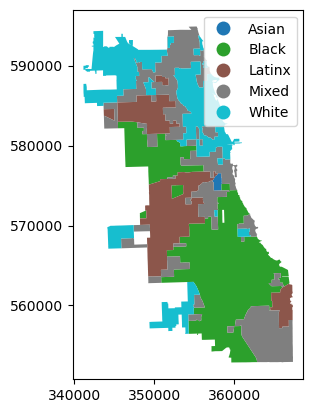

In [13]:
# Create dictionary for Population of Blocks with Access GeoDataFrame.
blocksPopAccessDict = {'accessPop':blocksPop_w_access.D001, 'geometry':blocksPop_w_access.geometry}
# Create GeoDataFrame.
blocksPopAccess = gpd.GeoDataFrame(blocksPopAccessDict, crs='EPSG:6454')
# Join Blocks and Tracts.
blocksMajorityGroup = gpd.sjoin(blocksPopAccess, tractsMaj, how='inner', predicate='within')
# Remove 'PopTotal' and 'index_right' from blocksMajorityGroup.
blocksMajorityGroup.pop('PopTotal')
blocksMajorityGroup.pop('index_right')
# # Dissolve and sum blocksMajorityGroup by 'majorGroup'.
tractsAccessPop = blocksMajorityGroup.dissolve(by='majorGroup', aggfunc = 'sum')
# Join tractsMajor to tractsAccessPop to have PopTotal for tractsAccessPop. 
### I use a different predicate here than in the initial study.
tractsAccessPop = gpd.sjoin(tractsMaj, tractsAccessPop, how='left', predicate='contains')
# Remove 'index_right' and 'totTract_right'.
tractsAccessPop.pop('index_right')
tractsAccessPop.pop('totTract_right')
# Rename 'totTract_left' to 'totTract'. 
tractsAccessPop = tractsAccessPop.rename(columns = {'totTract_left':'totTract'})
# Visualize results. 
tractsMaj.plot(column='majorGroup',legend=True)
tractsAccessPop

#### Calculate Area of Majority Racial Group.

In [14]:
# Calculate and add area of each Majority Group to GeoDataFrame.
tractsAccessPop['Area'] = tractsAccessPop.area
# # Visualize tractsAccessPop. 
# tractsAccessPop

#### Calculate Area Green Space per Majority Group

In [15]:
# Create gs_df (greenSpace) GeoDataFrame. 
gsDict = {'geometry':greenSpaces.geometry}
gs_df = gpd.GeoDataFrame(gsDict, crs='EPSG:6454')
# Calculate intersection of Green Spaces and Majority Groups. 
grpTractsGrnSp =tractsAccessPop.overlay(gs_df, how='intersection')
# Calculate area of Green Spaces in each Majority Group. 
grpTractsGrnSp['greenArea'] = grpTractsGrnSp.area
# # Visualize grpTractsGrnSp.
# grpTractsGrnSp

#### Calculate Green Space Per Personal and Population with Access

In [16]:
# Calculate % Population with Access column. 
grpTractsGrnSp['percentPopAccess'] = (grpTractsGrnSp.accessPop / grpTractsGrnSp.PopTotal)*100
# Calculate % Population with Access column. 
grpTractsGrnSp['greenPerPerson'] = (grpTractsGrnSp.greenArea / grpTractsGrnSp.PopTotal)
# # Visualize grpTractsGrnSp.
# grpTractsGrnSp

#### Format Reproduction Results

In [17]:
# Convert GeoDataFrame to DataFrame. Drop 'geometry' column.
resultsDF = pd.DataFrame(grpTractsGrnSp.drop(columns='geometry'))
# Rename DataFrame's columns.
resultsDF = resultsDF.rename(columns = {'majorGroup':'Majority Group', 'totTract':'Tracts',
                                        'PopTotal':'Population', 'Area':'Area (sqm)', 'greenArea':'Green Space Area (sqm)',
                                        'percentPopAccess':'Percent Population with Access',
                                        'greenPerPerson':'Green Space per Person (sqm)'})
# Convert 'Population' to int64 data type. 
resultsDF = resultsDF.astype({'Population':int})
# Round attributes to one decimal places.
resultsDF = resultsDF.round(decimals=1)
# Reindex DataFrame.
resultsDF = resultsDF.reindex([1, 3, 4, 2, 0])
# Export DataFrame
resultsDF.to_csv(here(path["rtab"], 'tractsAccess.csv'), index=False)
# Visualize results.
resultsDF

,Majority Group,Tracts,Population,accessPop,Area (sqm),Green Space Area (sqm),Percent Population with Access,Green Space per Person (sqm)
1,Black,269,755569,482153,196481793.6,13498778.1,63.8,17.9
3,Mixed,178,669499,510794,145342623.2,8965316.5,76.3,13.4
4,White,190,660728,485254,118606373.7,11511111.4,73.4,17.4
2,Latinx,146,579637,332655,96215419.6,2667938.9,57.4,4.6
0,Asian,4,13875,10876,1983068.4,27682.5,78.4,2.0


#### Original Study Results

In [18]:
# Import original study results.
origTable = gpd.read_file( here(path["rtab"], "origResults.csv") )
# Convert to DataFrame.
origTable = pd.DataFrame(origTable)
# Remove geometry column.
origTable.pop('geometry')
# Visualize the original study's results.
origTable

,Majority Tracts,Tracts,Population,Population with Access,Area (sqm),Green Space Area (sqm),Percent Population with Access,Green Space Per Person (sqm)
0,Black,269,755569,482153,196481794,13498778,63.8,17.9
1,Mixed,178,669499,510794,145342623,8965317,76.3,13.4
2,White,190,660728,485254,118606374,11511111,73.4,17.4
3,Latinx,146,579637,332655,96215420,2667939,57.4,4.6
4,Asian,4,13875,10876,1983068,27683,78.4,2.0


## Results

The reproduction study’s results match the original lab’s results.
The results can be seen in the second to last dataframe in the analysis.
The last dataframe is the original lab’s results.
The saved .csv file `resultsDF.to_csv(here(path["rtab"], 'tractsAccess.csv'), index=False)` matches the original results `‘origTable = gpd.read_file( here(path["rtab"], "origResults.csv") )`. 
The only difference is that the Green Space Area columns are rounded to different decimal places.
The reproduction did not reproduce the map found in the [original lab](https://github.com/t-sutter/RPr-Chicago-Greenspaces/blob/main/docs/report/originalStudy.pdf). 
The reproduction focuses on the geospatial abilities of geopandas and pandas and geospatial Python’s cartographic abilities. 


## Discussion

The hypothesis that the original QGIS lab could be reproduced in Python using pandas and geopandas packages proved true.
The geoprocessing abilities of the geopandas package can be utilized in **this case** to exactly reproduce the original lab.
This reproduction of a relatively simple analysis does not mean all QGIS analyses can be reproduced in geopandas. 

Different GIS softwares and tools can produce different answers for the same analysis due to differences in their construction. 
Calculating the distance between a point and a polygon where the reference point of the polygon matters.
If different softwares selects different points, unequal distances will be produced. 
Even if the tools in geopandas and QGIS are the same— they most likely are built upon the same packages like GDAL– their tools default values and input names are different. 
Understanding the difference in function parameters can prove more challenging than translating QGIS analysis into Python and geopandas. 

The study provides descriptive statistics of green space access in Chicago.
Asian, mixed, and white majority tracts have the highest percentage of population with access to green space. 
Asian majority tracts have access to smaller green spaces. 
While 78.4% of people living in Asian majority tracts have access to green space, they have the lowest green space per person at 2.0 square meters per person. 
Majority Black tracts have the most green space per person at 17.9 square meters per person; however, majority Black tracts have the second lowest percentage of access to green spaces at 63.8%. 
The percentage of the population with access to green spaces grants a good measure to understand the unequal geography of access to green spaces in Chicago. 
Green spaces per person offers a measure of the quality of access. 
Access to a corner lot park is different from access to a multi-acre forested park. 
Both serve a function, but they should not be considered the same. 

Discourses in urban green space studies challenge if designated parks and forests should be the measure of green spaces.
Some argue that a NDVI index would better capture the “green” of green spaces.
Others argue for a hierarchy within parks. 
Parks with shady tree canopies and large amounts of land could provide greater health benefits ([Zhang et al 2019](https://doi.org/10.3390/ijerph16040578)). 
The replication study does not enter the discourse on what should be considered green spaces although it notes the lack of consensus to better situate the results.


## Conclusion

The reproduction of the lab, [*Urban Environmental Justice of Green Space Access in Chicago*](https://github.com/t-sutter/RPr-Chicago-Greenspaces/blob/main/docs/report/originalStudy.pdf), succeeds in reproducing the original QGIS calculated results in Python with the geopandas package.
The reproduction validates the initial results and suggests the analytical similarities between geopandas and QGIS when accounting for fusion names and parameters prove manageable. 
Edge effect and spatial heterogeneity may threaten the validity of the modeling of actual green space access in Chicago. 
Though a relatively simple geospatial analysis, the reproduction of a QGIS analysis in Python with geopandas synthesizes two popular open source geographic information systems. 
Working between the two GIS softwares furthers the open source ethos of collaborative research and development. 
Both softwares have strengths in different aspects of geospatial analysis while increasing access to solve geospatial analyses. 


## Integrity Statement

No other pre-registration exists for this study; however, the pre-registration was written after the reproduction had begun. The unorthodox order should not impact the results of the study. The reproduction followed the original study’s workflow which was created before the analysis was run. 


# Acknowledgements

This reproduction was completed for the Middlebury College Department of Geography course GEOG 361: Open GIScience in Fall 2023. The course was taught by Professor Joseph Holler, PhD.

This report is based upon the template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences, DOI:[10.17605/OSF.IO/W29MQ](https://doi.org/10.17605/OSF.IO/W29MQ)

## References

Steven Manson, Jonathan Schroeder, David Van Riper, and Steven Ruggles. National Historical Geographic Information System: Version 13.0 [dataset]. Minneapolis, MN: IPUMS, 2018. https://doi.org/10.18128/D050.V13.0 

Tullis, Jason A., and Bandana Kar. “Where Is the Provenance? Ethical Replicability and Reproducibility in GIScience and Its Critical Applications.” Annals of the American Association of Geographers 111, no. 5 (July 29, 2021): 1318–28. https://doi.org/10.1080/24694452.2020.1806029.

Wilson, John P., Kevin Butler, Song Gao, Yingjie Hu, Wenwen Li, and Dawn J. Wright. “A Five-Star Guide for Achieving Replicability and Reproducibility When Working with GIS Software and Algorithms.” Annals of the American Association of Geographers 111, no. 5 (July 29, 2021): 1311–17. https://doi.org/10.1080/24694452.2020.1806026.

Zhang, Liqing, and Puay Yok Tan. “Associations between Urban Green Spaces and Health Are Dependent on the Analytical Scale and How Urban Green Spaces Are Measured.” International Journal of Environmental Research and Public Health 16, no. 4 (2019). https://doi.org/10.3390/ijerph16040578.
